<a href="https://colab.research.google.com/github/srikavya12-Kavs/Fake-news-detection/blob/main/IDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fake news detection using ML
221FA20017-S.Srikavya

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

Reading the datasets

In [ ]:
# prompt: please give path to fake.csv and true.csv

fake_path = 'Fake.csv'
true_path = 'True.csv'

In [ ]:
# prompt: read the dataset

fake_df = pd.read_csv(fake_path)
true_df = pd.read_csv(true_path)

In [ ]:
fake_df.shape

(23481, 4)

In [ ]:
true_df.shape

(21417, 4)

Data cleaning and preparation

In [ ]:

fake_df['target'] = 'fake'
true_df['target'] = 'true'

In [ ]:

data = pd.concat([fake_df, true_df]).reset_index(drop = True)
data.shape

(44898, 5)

In [ ]:

from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [ ]:
data.head()

,title,text,subject,date,target
0,White House meeting on Paris climate deal post...,WASHINGTON (Reuters) - A White House meeting t...,politicsNews,"April 18, 2017",true
1,Some Republicans see attacking Obamacare throu...,WASHINGTON (Reuters) - Congressional Republica...,politicsNews,"November 12, 2016",true
2,"Trump, Fox News Push ‘World War’ After Attack...",Fox News Channel host Bill O Reilly and Republ...,News,"July 14, 2016",fake
3,Nine killed by Nusra Front car bomb in southwe...,BEIRUT (Reuters) - A Nusra Front car bomb kill...,worldnews,"November 3, 2017",true
4,Honduran vote count gives Hernandez 1 point le...,TEGUCIGALPA (Reuters) - Honduran President Jua...,worldnews,"November 30, 2017",true


In [ ]:
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,White House meeting on Paris climate deal post...,WASHINGTON (Reuters) - A White House meeting t...,politicsNews,true
1,Some Republicans see attacking Obamacare throu...,WASHINGTON (Reuters) - Congressional Republica...,politicsNews,true
2,"Trump, Fox News Push ‘World War’ After Attack...",Fox News Channel host Bill O Reilly and Republ...,News,fake
3,Nine killed by Nusra Front car bomb in southwe...,BEIRUT (Reuters) - A Nusra Front car bomb kill...,worldnews,true
4,Honduran vote count gives Hernandez 1 point le...,TEGUCIGALPA (Reuters) - Honduran President Jua...,worldnews,true


In [ ]:
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,WASHINGTON (Reuters) - A White House meeting t...,politicsNews,true
1,WASHINGTON (Reuters) - Congressional Republica...,politicsNews,true
2,Fox News Channel host Bill O Reilly and Republ...,News,fake
3,BEIRUT (Reuters) - A Nusra Front car bomb kill...,worldnews,true
4,TEGUCIGALPA (Reuters) - Honduran President Jua...,worldnews,true


In [ ]:
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,washington (reuters) - a white house meeting t...,politicsNews,true
1,washington (reuters) - congressional republica...,politicsNews,true
2,fox news channel host bill o reilly and republ...,News,fake
3,beirut (reuters) - a nusra front car bomb kill...,worldnews,true
4,tegucigalpa (reuters) - honduran president jua...,worldnews,true


In [ ]:
import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [ ]:
data.head()

,text,subject,target
0,washington reuters a white house meeting that...,politicsNews,true
1,washington reuters congressional republicans ...,politicsNews,true
2,fox news channel host bill o reilly and republ...,News,fake
3,beirut reuters a nusra front car bomb killed ...,worldnews,true
4,tegucigalpa reuters honduran president juan o...,worldnews,true


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data.head()

,text,subject,target
0,washington reuters white house meeting help de...,politicsNews,true
1,washington reuters congressional republicans l...,politicsNews,true
2,fox news channel host bill reilly republican p...,News,fake
3,beirut reuters nusra front car bomb killed lea...,worldnews,true
4,tegucigalpa reuters honduran president juan or...,worldnews,true


Basic data exploration

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


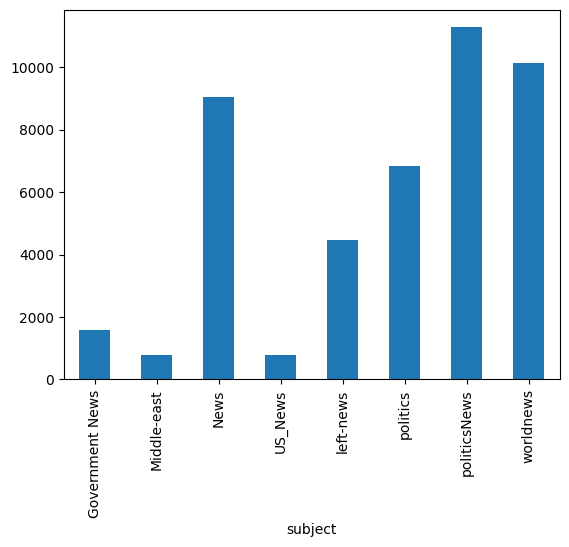

In [ ]:
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


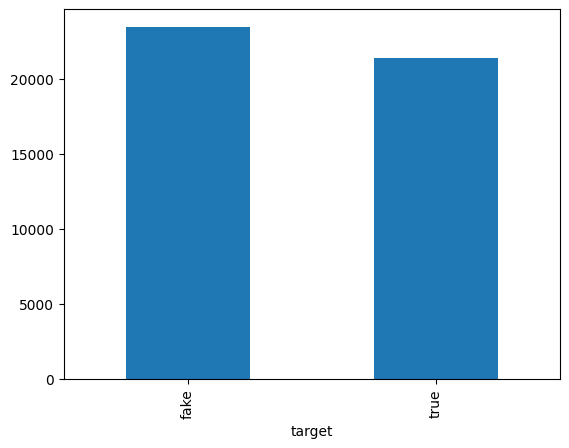

In [ ]:
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

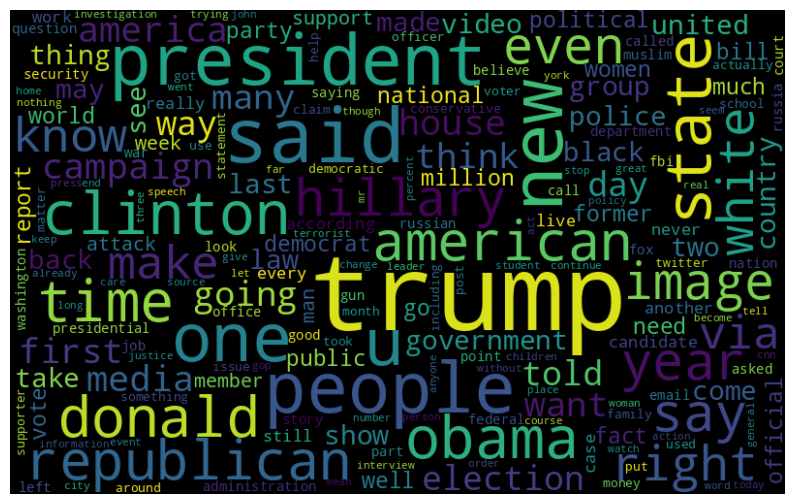

In [ ]:
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

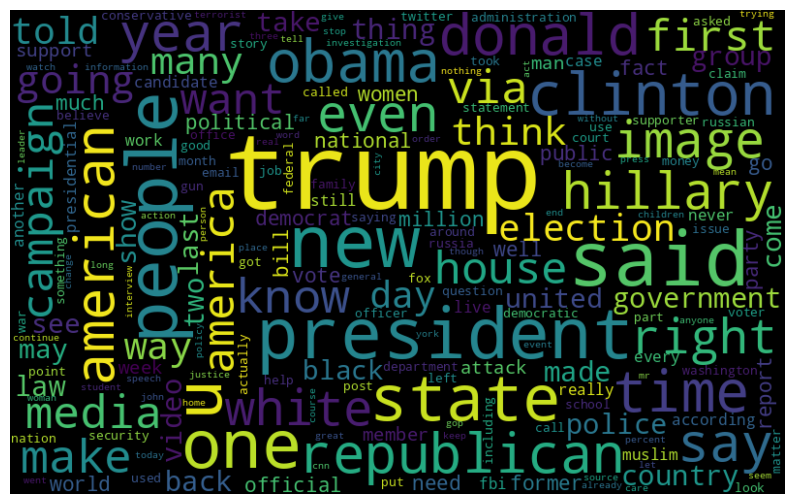

In [ ]:
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

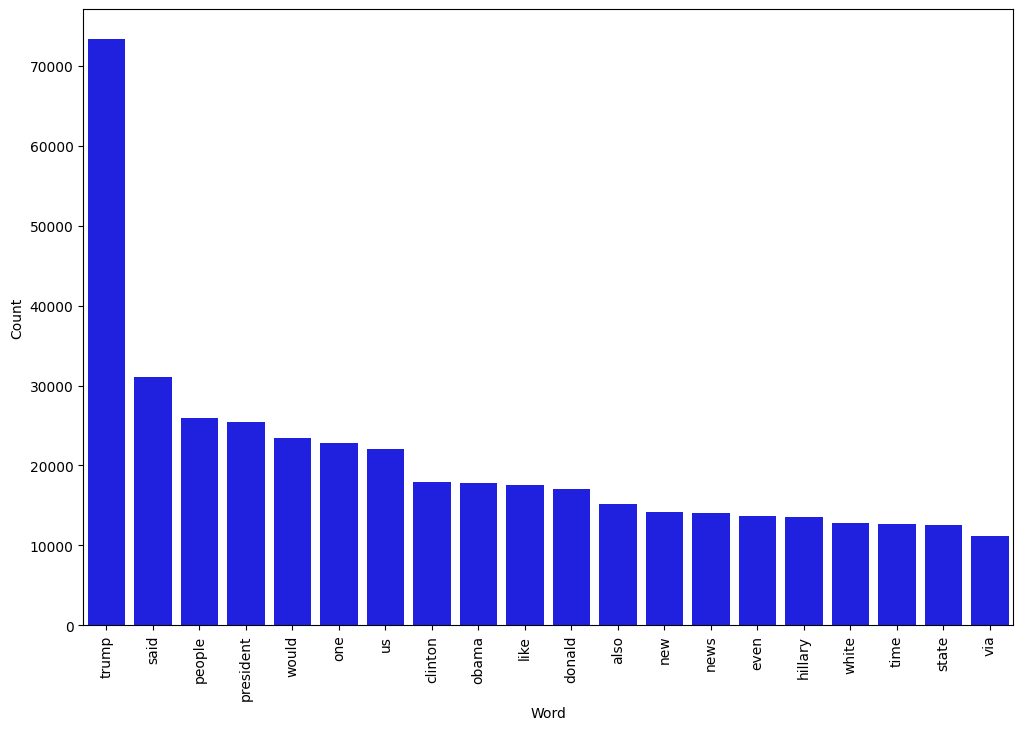

In [ ]:
counter(data[data["target"] == "fake"], "text", 20)

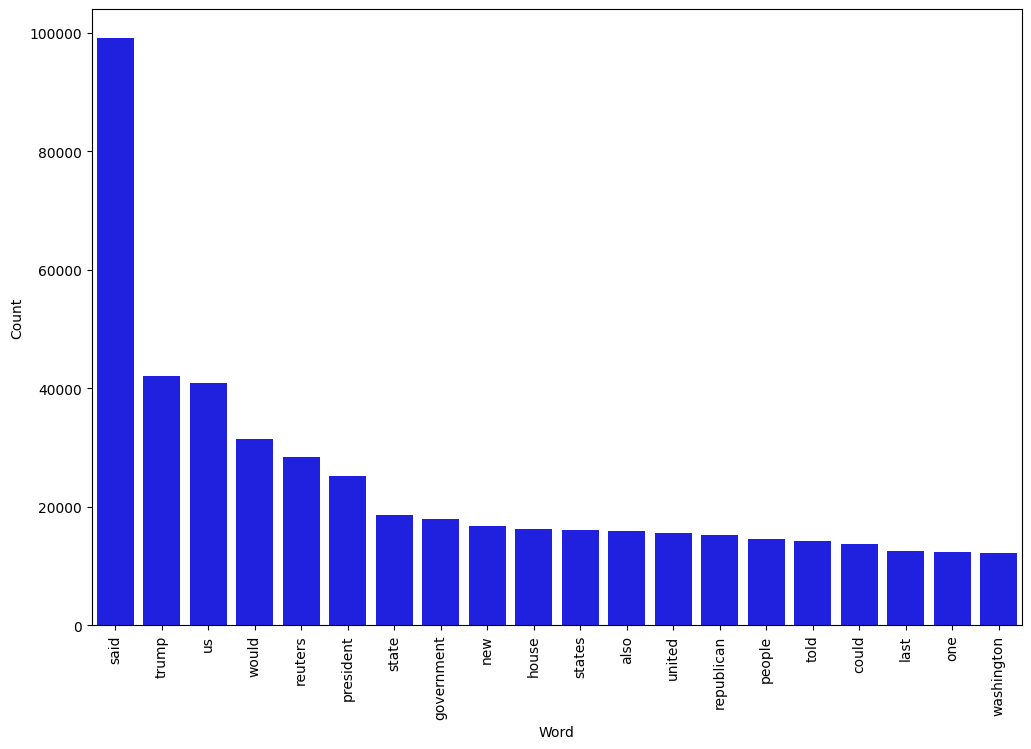

In [ ]:

counter(data[data["target"] == "true"], "text", 20)

Modeling

In [ ]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

Naive Bayes

In [ ]:
dct = dict()

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 95.13%


Confusion matrix, without normalization


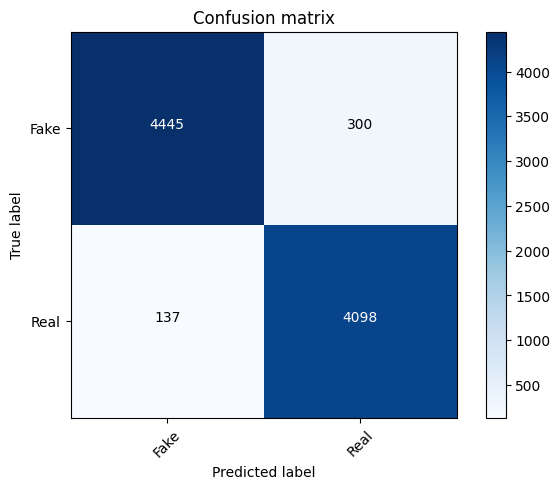

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

Logistic regression

In [ ]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 98.91%


Confusion matrix, without normalization


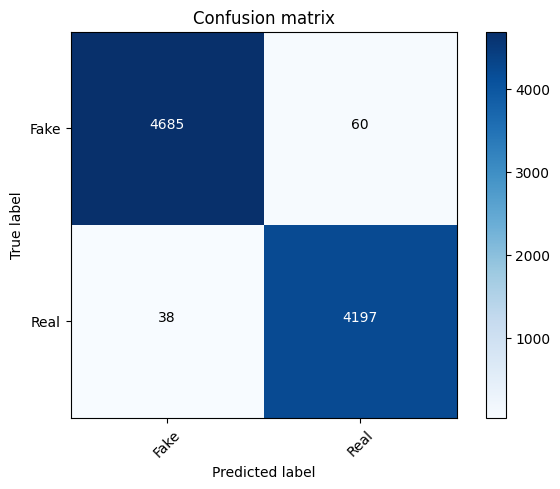

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20,
                                           splitter='best',
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.67%


Confusion matrix, without normalization


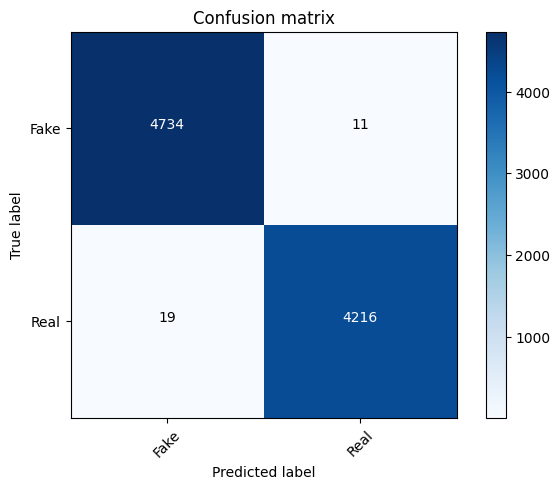

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.08%


Confusion matrix, without normalization


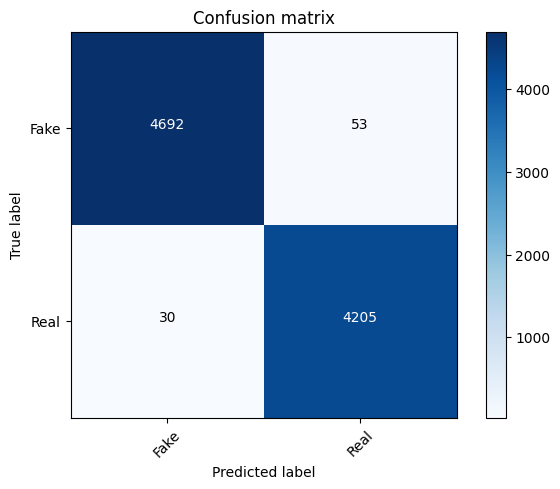

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

SVM

In [ ]:
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])
model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['SVM'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.59%


Confusion matrix, without normalization


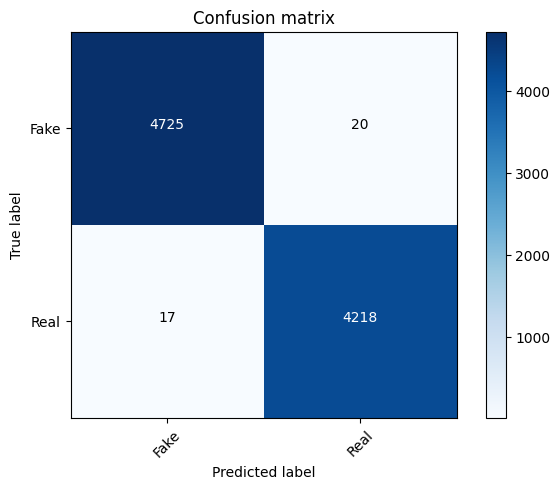

In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

Comparing Different Models

([<matplotlib.axis.YTick at 0x787815c9de70>,
 [Text(0, 91, '91'),
  Text(0, 92, '92'),
  Text(0, 93, '93'),
  Text(0, 94, '94'),
  Text(0, 95, '95'),
  Text(0, 96, '96'),
  Text(0, 97, '97'),
  Text(0, 98, '98'),
  Text(0, 99, '99'),
  Text(0, 100, '100')])

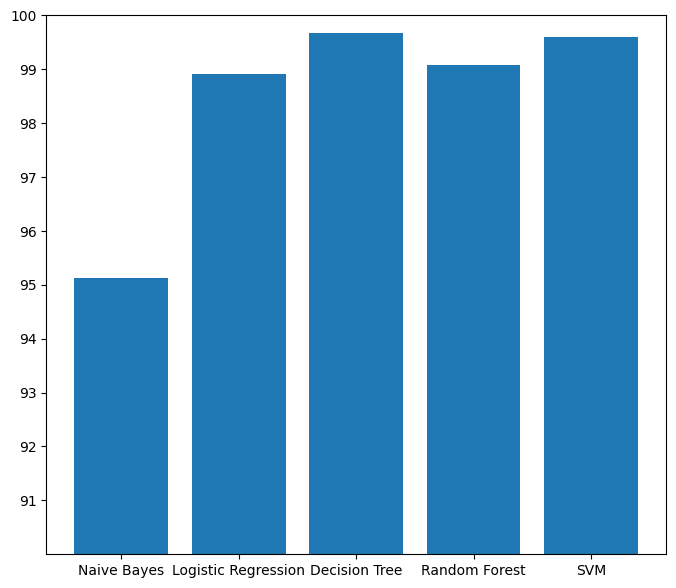

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(90,100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))

Accuracy tables

In [ ]:

from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Model", "Accuracy (%)"]
table.add_row(["Naive Bayes", 95.27])
table.add_row(["Logistic Regression", 98.84])
table.add_row(["Decision Tree", 99.58])
table.add_row(["Random Forest", 99.30])
table.add_row(["SVM", 99.44])

table

Model,Accuracy (%)
Naive Bayes,95.27
Logistic Regression,98.84
Decision Tree,99.58
Random Forest,99.3
SVM,99.44
